# MultiEval Example

This notebook demonstrates a basic parameter sweep with LensKits `MultiEval` class.

## Setup

We first need to import our libraries.

In [18]:
import sys
sys.path.insert(0,'C:\\Users\\Jacob\\Documents\\GitHub\\lenskit_confidence')

In [19]:
from lenskit.batch import MultiEval
from lenskit.crossfold import partition_users, SampleN
from lenskit.algorithms import basic, als, item_knn, user_knn
from lenskit.datasets import MovieLens
from lenskit import topn, util #, metrics
from lenskit.metrics import predict
import pandas as pd
import matplotlib.pyplot as plt

Progress bars are useful:

In [20]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

C:\Users\Jacob\anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


It takes a little while to run things, and can get kinda quiet in here. Let's set up logging so we can see the logging output in the notebook's message stream:

In [4]:
util.log_to_notebook()

[   INFO] lenskit.util.log notebook logging configured


Then set up the data access.

In [41]:
#mlsmall = MovieLens('../data/ml-latest-small')
mlsmall = MovieLens('../data/ml-1m')
#mlsmall = MovieLens('../data/ml-10m')
#mlsmall = MovieLens('../data/ml-20m')


## Experiment

We're going to run our evaluation and store its output in the `my-eval` directory, generating 20-item recommendation lists::

In [42]:
eval = MultiEval('my-eval', predict = True, recommend = 30)

We're going to use a 5-fold cross-validation setup.  We save the data into a list in memory so we have access to the test data later.  In a larger experiment, you might write the partitions to disk and pass the file names to `add_datasets`.

In [43]:
pairs = list(partition_users(mlsmall.ratings, 5, SampleN(5)))
#pairs = (partition_users(mlsmall.ratings, 5, SampleN(5)))
pairs

[   INFO] lenskit.crossfold partitioning 1000209 rows for 6040 users into 5 partitions
[   INFO] lenskit.crossfold fold 0: selecting test ratings
[   INFO] lenskit.crossfold fold 0: partitioning training data
[   INFO] lenskit.crossfold fold 1: selecting test ratings
[   INFO] lenskit.crossfold fold 1: partitioning training data
[   INFO] lenskit.crossfold fold 2: selecting test ratings
[   INFO] lenskit.crossfold fold 2: partitioning training data
[   INFO] lenskit.crossfold fold 3: selecting test ratings
[   INFO] lenskit.crossfold fold 3: partitioning training data
[   INFO] lenskit.crossfold fold 4: selecting test ratings
[   INFO] lenskit.crossfold fold 4: partitioning training data


[TTPair(train=         Unnamed: 0  user  item  rating  timestamp
 0                 1     1  1193     5.0  978300760
 1                 2     1   661     3.0  978302109
 2                 3     1   914     3.0  978301968
 3                 4     1  3408     4.0  978300275
 4                 5     1  2355     5.0  978824291
 ...             ...   ...   ...     ...        ...
 1000204     1000205  6040  1091     1.0  956716541
 1000205     1000206  6040  1094     5.0  956704887
 1000206     1000207  6040   562     5.0  956704746
 1000207     1000208  6040  1096     4.0  956715648
 1000208     1000209  6040  1097     4.0  956715569
 
 [994169 rows x 5 columns], test=        Unnamed: 0  user  item  rating  timestamp
 667            668     8  3265     5.0  978229138
 624            625     8  2442     4.0  978230550
 612            613     8  1277     3.0  978229614
 571            572     8  3148     3.0  978230248
 671            672     8  2396     5.0  978229524
 ...            ...   .

In [44]:
eval.add_datasets(pairs, name = 'ML-Small')

In [45]:
nhbr_range = [10, 25, 100] #, 50, 75, 100]

In [10]:
#eval.add_algorithms([item_knn.ItemItem(nnbrs = f, aggregate = 'weighted-average') for f in nhbr_range], 
#                    attrs = ['nnbrs'], name = 'ItemKNN-Weighted')

#eval.add_algorithms([item_knn.ItemItem(nnbrs = f, aggregate = 'sum') for f in nhbr_range], 
#                    attrs = ['nnbrs'], name = 'ItemKNN-Sum')

In [46]:
eval.add_algorithms([user_knn.UserUser(nnbrs = f, aggregate = 'weighted-average') for f in nhbr_range], 
                    attrs = ['nnbrs'], name = 'UserKNN-Weighted')

#eval.add_algorithms([user_knn.UserUser(nnbrs = f, aggregate = 'sum') for f in nhbr_range], 
#                    attrs = ['nnbrs'], name = 'UserKNN-Sum')

And add a popular baseline for comparison:

In [ ]:
eval.add_algorithms(basic.Popular(), name = 'Pop')

And finally, we will run the experiment!

In [47]:
eval.run(progress = tqdm)

[   INFO] lenskit.batch._multi starting run 1: UserUser(nnbrs=10, min_sim=0) on ML-Small:1
[   INFO] lenskit.batch._multi adapting UserUser(nnbrs=10, min_sim=0) into a recommender
[   INFO] lenskit.batch._multi training algorithm UserUser(nnbrs=10, min_sim=0) on 994169 ratings
[   INFO] lenskit.algorithms.user_knn calling fit in user_knn
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 994169 ratings
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=10, min_sim=0) in  609ms
[   INFO] lenskit.batch._multi generating 6040 predictions for TopN/UserUser(nnbrs=10, min_sim=0)
[   INFO] lenskit.batch._predict calling predict function in _predict file
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=10, min_sim=0) to 1121 pickle bytes with 13 buffers of 28104104 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 6040 predictions for 1208 users (setup took  50ms)
[   INF

[   INFO] lenskit.algorithms.user_knn calling fit in user_knn
[   INFO] lenskit.algorithms.basic trained unrated candidate selector for 994169 ratings
[   INFO] lenskit.batch._multi trained algorithm UserUser(nnbrs=25, min_sim=0) in  443ms
[   INFO] lenskit.batch._multi generating 6040 predictions for TopN/UserUser(nnbrs=25, min_sim=0)
[   INFO] lenskit.batch._predict calling predict function in _predict file
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=25, min_sim=0) to 1121 pickle bytes with 13 buffers of 28104144 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 6040 predictions for 1208 users (setup took  51ms)
[   INFO] lenskit.batch._predict generated 6040 predictions for 1208 users in 21.21s
[   INFO] lenskit.batch._multi generated predictions in 22.22s
[   INFO] lenskit.batch._multi run 5: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommenda

[   INFO] lenskit.batch._predict calling predict function in _predict file
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=100, min_sim=0) to 1121 pickle bytes with 13 buffers of 28104144 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._predict generating 6040 predictions for 1208 users (setup took  40ms)
[   INFO] lenskit.batch._predict generated 6040 predictions for 1208 users in 22.89s
[   INFO] lenskit.batch._multi generated predictions in 23.55s
[   INFO] lenskit.batch._multi run 9: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 1208 users for TopN/UserUser(nnbrs=100, min_sim=0)
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=100, min_sim=0) to 1121 pickle bytes with 13 buffers of 28104144 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/UserUser(n

[   INFO] lenskit.batch._predict generating 6040 predictions for 1208 users (setup took  53ms)
[   INFO] lenskit.batch._predict generated 6040 predictions for 1208 users in 17.45s
[   INFO] lenskit.batch._multi generated predictions in 18.10s
[   INFO] lenskit.batch._multi run 13: writing results to my-eval\predictions.parquet
[   INFO] lenskit.batch._multi generating recommendations for 1208 users for TopN/UserUser(nnbrs=10, min_sim=0)
[   INFO] lenskit.sharing.shm serialized TopN/UserUser(nnbrs=10, min_sim=0) to 1121 pickle bytes with 13 buffers of 28104124 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.batch._recommend recommending with TopN/UserUser(nnbrs=10, min_sim=0) for 1208 users (n_jobs=None)
[   INFO] lenskit.batch._recommend recommended for 1208 users in 33.00s
[   INFO] lenskit.batch._multi generated recommendations in 33.52s
[   INFO] lenskit.batch._multi run 13: writing results to my-eval\recommendations.parquet
[   IN

## Analysis

Now that the experiment is run, we can read its outputs.

First the run metadata:

In [48]:
runs = pd.read_csv('my-eval/runs.csv')
runs.set_index('RunId', inplace = True)
runs.head()

,DataSet,Partition,AlgoClass,AlgoStr,name,nnbrs,TrainTime,PredTime,RecTime
RunId,,,,,,,,,
1,ML-Small,1,UserUser,"UserUser(nnbrs=10, min_sim=0)",UserKNN-Weighted,10,0.608818,26.907549,39.332532
2,ML-Small,1,UserUser,"UserUser(nnbrs=25, min_sim=0)",UserKNN-Weighted,25,0.495195,18.037255,36.934542
3,ML-Small,1,UserUser,"UserUser(nnbrs=100, min_sim=0)",UserKNN-Weighted,100,0.507073,17.790492,46.801676
4,ML-Small,2,UserUser,"UserUser(nnbrs=10, min_sim=0)",UserKNN-Weighted,10,0.518986,17.768336,33.281031
5,ML-Small,2,UserUser,"UserUser(nnbrs=25, min_sim=0)",UserKNN-Weighted,25,0.442680,22.223344,38.194218


This describes each run - a data set, partition, and algorithm combination.  To evaluate, we need to get the actual recommendations, and combine them with this:

In [49]:
recs = pd.read_parquet('my-eval/recommendations.parquet')
#del recs['RunId']
recs.head()

,item,score,user,rank,RunId
0,557,5.962448,8,1,1
1,2309,5.486417,8,2,1
2,1851,5.370696,8,3,1
3,1089,5.305697,8,4,1
4,3245,5.303330,8,5,1


In [51]:
recs

,item,score,user,rank,RunId
0,557,5.962448,8,1,1
1,2309,5.486417,8,2,1
2,1851,5.370696,8,3,1
3,1089,5.305697,8,4,1
4,3245,5.303330,8,5,1
...,...,...,...,...,...
543595,729,4.827533,6039,26,9
543596,1420,4.788544,6039,27,9
543597,3881,4.787606,6039,28,9
543598,3295,4.773750,6039,29,9


Getting the predictions...

In [50]:
preds = pd.read_parquet('my-eval/predictions.parquet')
#del recs['RunId']
preds

,RunId,user,item,rating,prediction
0,1,8,3265,5.0,4.888870
1,1,8,2442,4.0,3.793857
2,1,8,1277,3.0,4.359651
3,1,8,3148,3.0,4.318624
4,1,8,2396,5.0,4.384924
...,...,...,...,...,...
90595,9,6039,1230,3.0,4.082240
90596,9,6039,1282,3.0,4.215474
90597,9,6039,926,5.0,4.568583
90598,9,6039,1022,4.0,3.983947


We're going to compute per-(run,user) evaluations of the recommendations *before* combining with metadata. 

In order to evaluate the recommendation list, we need to build a combined set of truth data. Since this is a disjoint partition of users over a single data set, we can just concatenate the individual test frames:

In [52]:
truth = pd.concat((p.test for p in pairs), ignore_index = True)

#truth['score'] = truth['rating']
truth.head()

,Unnamed: 0,user,item,rating,timestamp
0,668,8,3265,5.0,978229138
1,625,8,2442,4.0,978230550
2,613,8,1277,3.0,978229614
3,572,8,3148,3.0,978230248
4,672,8,2396,5.0,978229524


In [53]:
truth

,Unnamed: 0,user,item,rating,timestamp
0,668,8,3265,5.0,978229138
1,625,8,2442,4.0,978230550
2,613,8,1277,3.0,978229614
3,572,8,3148,3.0,978230248
4,672,8,2396,5.0,978229524
...,...,...,...,...,...
30195,998285,6033,1193,5.0,956713500
30196,998284,6033,1127,4.0,956713999
30197,998324,6033,858,4.0,956713838
30198,998282,6033,2826,3.0,956713587


Now we can set up an analysis and compute the results.

In [54]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg) # precision, recall, recip_rank, dcg, ndcg
rla.add_metric(topn.precision)
#rla.add_metric(predict.rmse)
raw_ndcg = rla.compute(recs, truth)
raw_ndcg.head()

[   INFO] lenskit.topn analyzing 543600 recommendations (30200 truth rows)
[   INFO] lenskit.topn using rec key columns ['RunId', 'user']
[   INFO] lenskit.topn using truth key columns ['user']
[   INFO] lenskit.topn collecting truth data
[   INFO] lenskit.topn collecting metric results
[   INFO] lenskit.sharing.shm serialized <lenskit.topn._RLAJob object at 0x000001F620099880> to 2634822 pickle bytes with 24163 buffers of 18240800 bytes
[   INFO] lenskit.util.parallel setting up ProcessPoolExecutor w/ 2 workers
[   INFO] lenskit.topn measured 18120 lists in 1m19.45s


nrecs      ndcg  precision
RunId user                            
1     8      30.0  0.000000   0.000000
      9      30.0  0.058763   0.033333
      13     30.0  0.000000   0.000000
      24     30.0  0.000000   0.000000
      32     30.0  0.000000   0.000000

Next, we need to combine this with our run data, so that we know what algorithms and configurations we are evaluating:

In [55]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg = raw_ndcg.join(runs[['name', 'nnbrs']], on = 'RunId')
ndcg.head()

nrecs      ndcg  precision              name  nnbrs
RunId user                                                     
1     8      30.0  0.000000   0.000000  UserKNN-Weighted     10
      9      30.0  0.058763   0.033333  UserKNN-Weighted     10
      13     30.0  0.000000   0.000000  UserKNN-Weighted     10
      24     30.0  0.000000   0.000000  UserKNN-Weighted     10
      32     30.0  0.000000   0.000000  UserKNN-Weighted     10

We can compute the overall average performance for each algorithm configuration - fillna makes the group-by happy with Popular's lack of a feature count:

In [56]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
ndcg.fillna(0).groupby(['name', 'nnbrs'])['ndcg','precision'].mean()

<ipython-input-56-9f49e897c919>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ndcg.fillna(0).groupby(['name', 'nnbrs'])['ndcg','precision'].mean()


ndcg  precision
name             nnbrs                     
UserKNN-Weighted 10     0.013905   0.005088
                 25     0.012869   0.004945
                 100    0.011435   0.004741

Now, we can plot this:

Text(0, 0.5, 'nDCG')

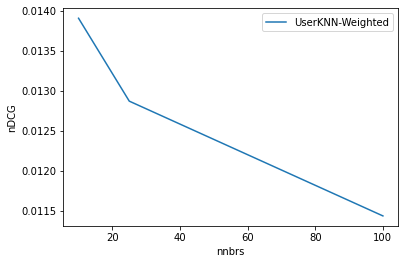

In [57]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
mf_scores = ndcg.groupby(['name', 'nnbrs'])['ndcg'].mean().reset_index()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('name'):
    plt.plot(data['nnbrs'], data['ndcg'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('nDCG')

Text(0, 0.5, 'Precision')

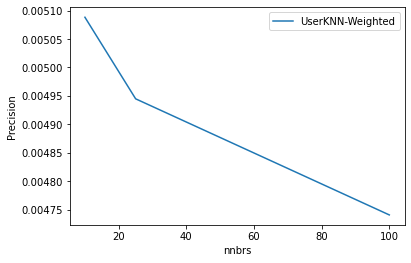

In [58]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
mf_scores = ndcg.groupby(['name', 'nnbrs'])['precision'].mean().reset_index()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in mf_scores.groupby('name'):
    plt.plot(data['nnbrs'], data['precision'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('Precision')

In [59]:
#truth # user, item, rating, timestamp - 3355
#preds # RunId, user, item rating, prediction

### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
pred_acc = preds.join(runs[['name', 'nnbrs']], on = 'RunId')
pred_acc.head()


#from lenskit.metrics.predict import rmse
#rmse(preds['prediction'], preds['rating'])

,RunId,user,item,rating,prediction,name,nnbrs
0,1,8,3265,5.0,4.888870,UserKNN-Weighted,10
1,1,8,2442,4.0,3.793857,UserKNN-Weighted,10
2,1,8,1277,3.0,4.359651,UserKNN-Weighted,10
3,1,8,3148,3.0,4.318624,UserKNN-Weighted,10
4,1,8,2396,5.0,4.384924,UserKNN-Weighted,10


In [60]:
pred_acc.loc[pred_acc['prediction'] > 5,'prediction'] = 5
pred_acc.loc[pred_acc['prediction'] < 1,'prediction'] = 1

pred_acc['se'] = (pred_acc['rating'] - pred_acc['prediction'])**2


#pred_acc.groupby(['AlgoClass', 'nnbrs'])['rating','prediction'])


#ndcg.fillna(0).groupby(['AlgoClass', 'nnbrs'])['ndcg','precision'].mean()

In [61]:
import numpy as np
#from np import sqrt
np.sqrt(pred_acc.groupby(['name', 'nnbrs'])['se'].mean())

name              nnbrs
UserKNN-Weighted  10       0.929956
                  25       0.915259
                  100      0.915348
Name: se, dtype: float64

Text(0, 0.5, 'RMSE')

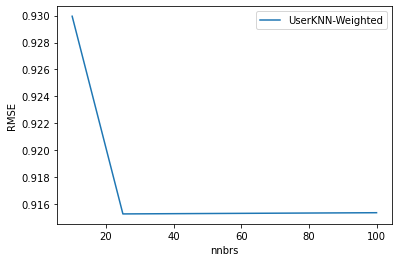

In [62]:
### FOR NEIGHBORHOOD-BASED METHODS ONLY ###
knn_pred_scores = np.sqrt(pred_acc.groupby(['name', 'nnbrs'])['se'].mean()).reset_index()
knn_pred_scores.head()
#pop_score = ndcg[ndcg['AlgoClass'] == 'Popular']['ndcg'].mean()
#plt.axhline(pop_score, color='grey', linestyle='--', label='Popular')
for algo, data in knn_pred_scores.groupby('name'):
    plt.plot(data['nnbrs'], data['se'], label=algo)
plt.legend()
plt.xlabel('nnbrs')
plt.ylabel('RMSE')